## Списки

Вам дан список. Поменяйте порядок следования элементов, начиная с середины до конца списка.

In [71]:
a = [1,2,3,4,5]
a[len(a)//2::] = a[:len(a)//2-1:-1]
a

[1, 2, 5, 4, 3]

Вам дан список. Поменяйте в нём местами блоки элементов: каждый чётный со второго по пятый с каждым нечётым со второго по пятый с конца. 

In [72]:
a = [1,2,3,4,5,6,7,8,9]
b = a
c = a[1:5:2]
b[1:5:2] = a[-5:-2:2]
b[-5:-2:2] = c
b

[1, 5, 3, 7, 2, 6, 4, 8, 9]

## Генераторы

Вам дан список. Создайте новый список, который возведёт в квадрат элементы исходного списка.

In [73]:
a = [1,2,3,4,5,6,7,8,9]
b = [a[i]**2 for i in range(len(a))]
b

[1, 4, 9, 16, 25, 36, 49, 64, 81]

Вам дан список. Создайте новый список, который вычитает из каждого элемента списка пять. 

In [74]:
a = [1,2,3,4,5,6,7,8,9]
b = [a[i]-5 for i in range(len(a))]
b

[-4, -3, -2, -1, 0, 1, 2, 3, 4]

## Встроенные функции

Вам дана строка. Выведите разницу между наибольшим и наименьшим ascii-кодом символа в строке. 

In [75]:
s = "text"
max = 0
min = 128
for i in s:
    if ord(i) > max:
        max = ord(i)
    if ord(i) < min:
        min = ord(i)
print(max-min)

19


Вам дана строка. Выведите отсортированную строку, приведённую к верхнему регистру. 

In [76]:
s = "text"
s = sorted(s)
ans = ""
for i in s:
    ans += chr(ord(i)-32)
ans


'ETTX'

## NumPy

Вам дан одномерный массив. На основе этого массива сгенерируйте двумерный массив, который группирует по 4 элемента в строку из исходного.

Размерность исходного массива кратна 4.

Например:

`A = [1,2,3,4,5]` - исходный массив

`B = [[1,2,3,4],[2,3,4,5]]` - полученный

In [77]:
import numpy as np

A = np.array([1,2,3,4,5,6])
B = np.array([A[i:i+4:] for i in range(len(A)-3)])
B

array([[1, 2, 3, 4],
       [2, 3, 4, 5],
       [3, 4, 5, 6]])

Дан массив числе одномерный


Создайте двумерный массив, где строка это бинарное представление числа из исходного.

Например:
`A = [0, 1, 2]` - исходный массив

`B = [[0 0 0 0 0 0 0 0]
     [0 0 0 0 0 0 0 1]
     [0 0 0 0 0 0 1 0]]` - полученный

In [78]:
A = np.array([0,1,2] , dtype=np.uint8)
B = A.reshape((len(A), 1))
B = np.unpackbits(B, axis=1)
print(B)

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]]


## Pandas

https://www.kaggle.com/datasets/muhammetvarl/laptop-price

- Какие типы данных присутствуют в датасете?
- Есть ли в датасете пропущенные значения? Если да, то сколько и где?
- Очистите переменные: например `Ram` от Gb (сделав ее числовой), `ScreenResolution` создайте две колонки, например, ширина отдельно и длинна отдельно (тем самым сделав ее числовой), разделите колонку `Cpu` отдельно на тип процессора и отдельно на часототу, и так далее.
- Постройте heatmap для матрицы корреляции числовых переменных в датасете.
- Постройте pairplot для всех переменных.
- Постройте boxplot для всех переменных и выведете объекты которые являются выбросами (строки из датафрейма).
- Постройте гистраграмму переменной `Company`.

In [296]:
import pandas as pd
import re

df = pd.read_csv('laptop_price.csv',encoding='ISO-8859-1')

In [297]:
# - Какие типы данных присутствуют в датасете?
# - Есть ли в датасете пропущенные значения? Если да, то сколько и где?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [298]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [299]:
# - Очистите переменные: например `Ram` от Gb (сделав ее числовой), `ScreenResolution` создайте две колонки,
#  например, ширина отдельно и длинна отдельно (тем самым сделав ее числовой), разделите колонку `Cpu` отдельно
#  на тип процессора и отдельно на часототу, и так далее.
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

In [300]:
def ext_res(resolution):
    match = re.findall(r'\d+x\d+', resolution)
    width, height = map(int, match[0].split('x'))
    return pd.Series([width, height])

df[['Width', 'Height']]= df['ScreenResolution'].apply(ext_res)
df = df.drop(['ScreenResolution'], axis=1)

In [301]:
# def ext(memory):
#     ssd, hdd, flash_storage, hybrid = 0, 0, 0, 0

#     ssd_matches = re.findall(r'\d+.?\d*[TB|GB]*\sSSD', memory, re.IGNORECASE)
#     hdd_matches = re.findall(r'\d+.?\d*[TB|GB]*\sHDD', memory, re.IGNORECASE)
#     flash_matches = re.findall(r'\d+.?\d*[TB|GB]*\sFlash\sStorage', memory, re.IGNORECASE)
#     hybrid_matches = re.findall(r'\d+.?\d*[TB|GB]*\sHybrid', memory, re.IGNORECASE)

#     def convert_to_gb(value, unit):
#         if unit.upper() == 'TB':
#             return value * 1024
#         return value
    
#     for match in ssd_matches:
#         value = float(re.split(r'[TB|GB]', match)[0])
#         unit = re.search(r'(TB|GB)', match, re.IGNORECASE)[0]
#         ssd += round(convert_to_gb(value, unit))
    
#     for match in hdd_matches:
#         value = float(re.split(r'[TB|GB]', match)[0])
#         unit = re.search(r'(TB|GB)', match, re.IGNORECASE)[0]
#         hdd += round(convert_to_gb(value, unit))
    
#     for match in flash_matches:
#         value = float(re.split(r'[TB|GB]', match)[0])
#         unit = re.search(r'(TB|GB)', match, re.IGNORECASE)[0]
#         flash_storage += round(convert_to_gb(value, unit))

#     for match in hybrid_matches:
#         value = float(re.split(r'[TB|GB]', match)[0])
#         unit = re.search(r'(TB|GB)', match, re.IGNORECASE)[0]
#         hybrid += round(convert_to_gb(value, unit))
    
#     return pd.Series([ssd, hdd, hybrid, flash_storage])


# df[['SSD', 'HDD', 'Hybrid', 'Flash Storage']] = df['Memory'].apply(ext)

# df = df.drop(['Memory'], axis=1)


In [302]:
pattern_ssd = '\d+\.?\d*\w{2} SSD'
pattern_hdd = '\d+\.?\d*\w{2} HDD'
pattern_hybrid = '\d+\.?\d*\w{2} Hybrid'
pattern_flash = '\d+\.?\d*\w{2} Flash Storage'

def convert_to_gb(value, unit):
        if unit.upper() == 'TB':
            return int(value * 1024)
        return int(value)

def find_pattern(string, pattern):
    if re.search(pattern, string):
        object = re.search(pattern, string).group(0).split()[0]
        value = object[:-2]
        unit = object[-2:]
        return convert_to_gb(float(value), unit)
    else:
        return 0

df['SSD'] = df['Memory'].apply(lambda x: find_pattern(x,pattern_ssd))
df['HDD'] = df['Memory'].apply(lambda x: find_pattern(x,pattern_hdd))
df['Hybrid'] = df['Memory'].apply(lambda x: find_pattern(x,pattern_hybrid))
df['Flash Storage'] = df['Memory'].apply(lambda x: find_pattern(x,pattern_flash))
df = df.drop(['Memory'], axis=1)

In [303]:
df

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Width,Height,SSD,HDD,Hybrid,Flash Storage
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560,1600,128,0,0,0
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900,0,0,0,128
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86kg,575.00,1920,1080,256,0,0,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880,1800,512,0,0,0
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560,1600,256,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,1.8kg,638.00,1920,1080,128,0,0,0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,3200,1800,512,0,0,0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows 10,1.5kg,229.00,1366,768,0,0,0,64
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,1366,768,0,1024,0,0


In [317]:
df["Hybrid"].value_counts()

Hybrid
0       1291
1024      11
508        1
Name: count, dtype: int64

In [305]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [306]:
def ext_cpu(cpu):
    match = re.findall(r'\d+\.?\d*GHz', cpu)
    ans, not_ans = map(str, match[0].split('GHz'))
    return pd.Series([float(ans)])


df[['Cpu_GHz']] = df['Cpu'].apply(ext_cpu)

df['Cpu_model'] = df['Cpu'].replace(to_replace=r'\s+\d+\.?\d*GHz', value='', regex=True)
df = df.drop(['Cpu'], axis=1)

In [307]:
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

In [308]:
df

,laptop_ID,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,Width,Height,SSD,HDD,Hybrid,Flash Storage,Cpu_GHz,Cpu_model
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560,1600,128,0,0,0,2.3,Intel Core i5
1,2,Apple,Macbook Air,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440,900,0,0,0,128,1.8,Intel Core i5
2,3,HP,250 G6,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,1920,1080,256,0,0,0,2.5,Intel Core i5 7200U
3,4,Apple,MacBook Pro,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880,1800,512,0,0,0,2.7,Intel Core i7
4,5,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560,1600,256,0,0,0,3.1,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Intel HD Graphics 520,Windows 10,1.80,638.00,1920,1080,128,0,0,0,2.5,Intel Core i7 6500U
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Intel HD Graphics 520,Windows 10,1.30,1499.00,3200,1800,512,0,0,0,2.5,Intel Core i7 6500U
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Intel HD Graphics,Windows 10,1.50,229.00,1366,768,0,0,0,64,1.6,Intel Celeron Dual Core N3050
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,AMD Radeon R5 M330,Windows 10,2.19,764.00,1366,768,0,1024,0,0,2.5,Intel Core i7 6500U


In [309]:
df["Hybrid"].value_counts()

Hybrid
0       1291
1024      11
508        1
Name: count, dtype: int64

<Axes: >

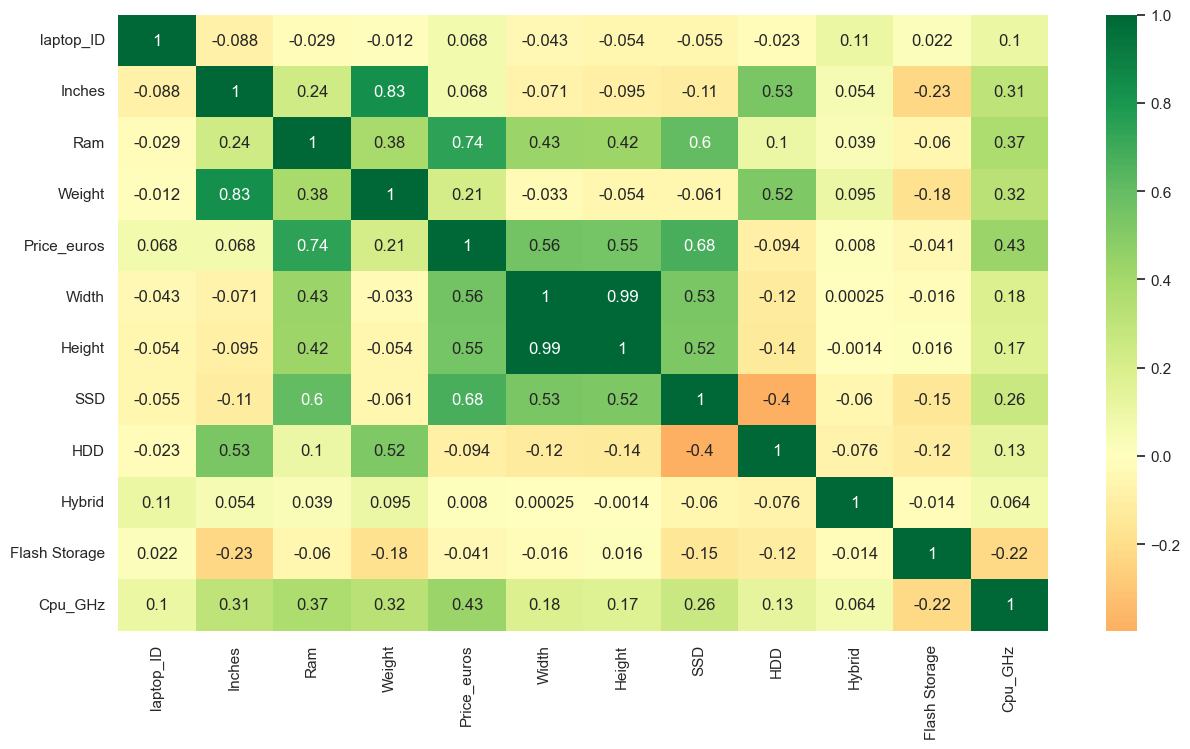

In [310]:
import seaborn as sns

sns.set(rc={"figure.figsize": (15, 8)})
sns.heatmap(df.corr(numeric_only=True), xticklabels=df.corr(numeric_only=True).columns, yticklabels=df.corr(numeric_only=True).columns, cmap='RdYlGn', center=0, annot=True)

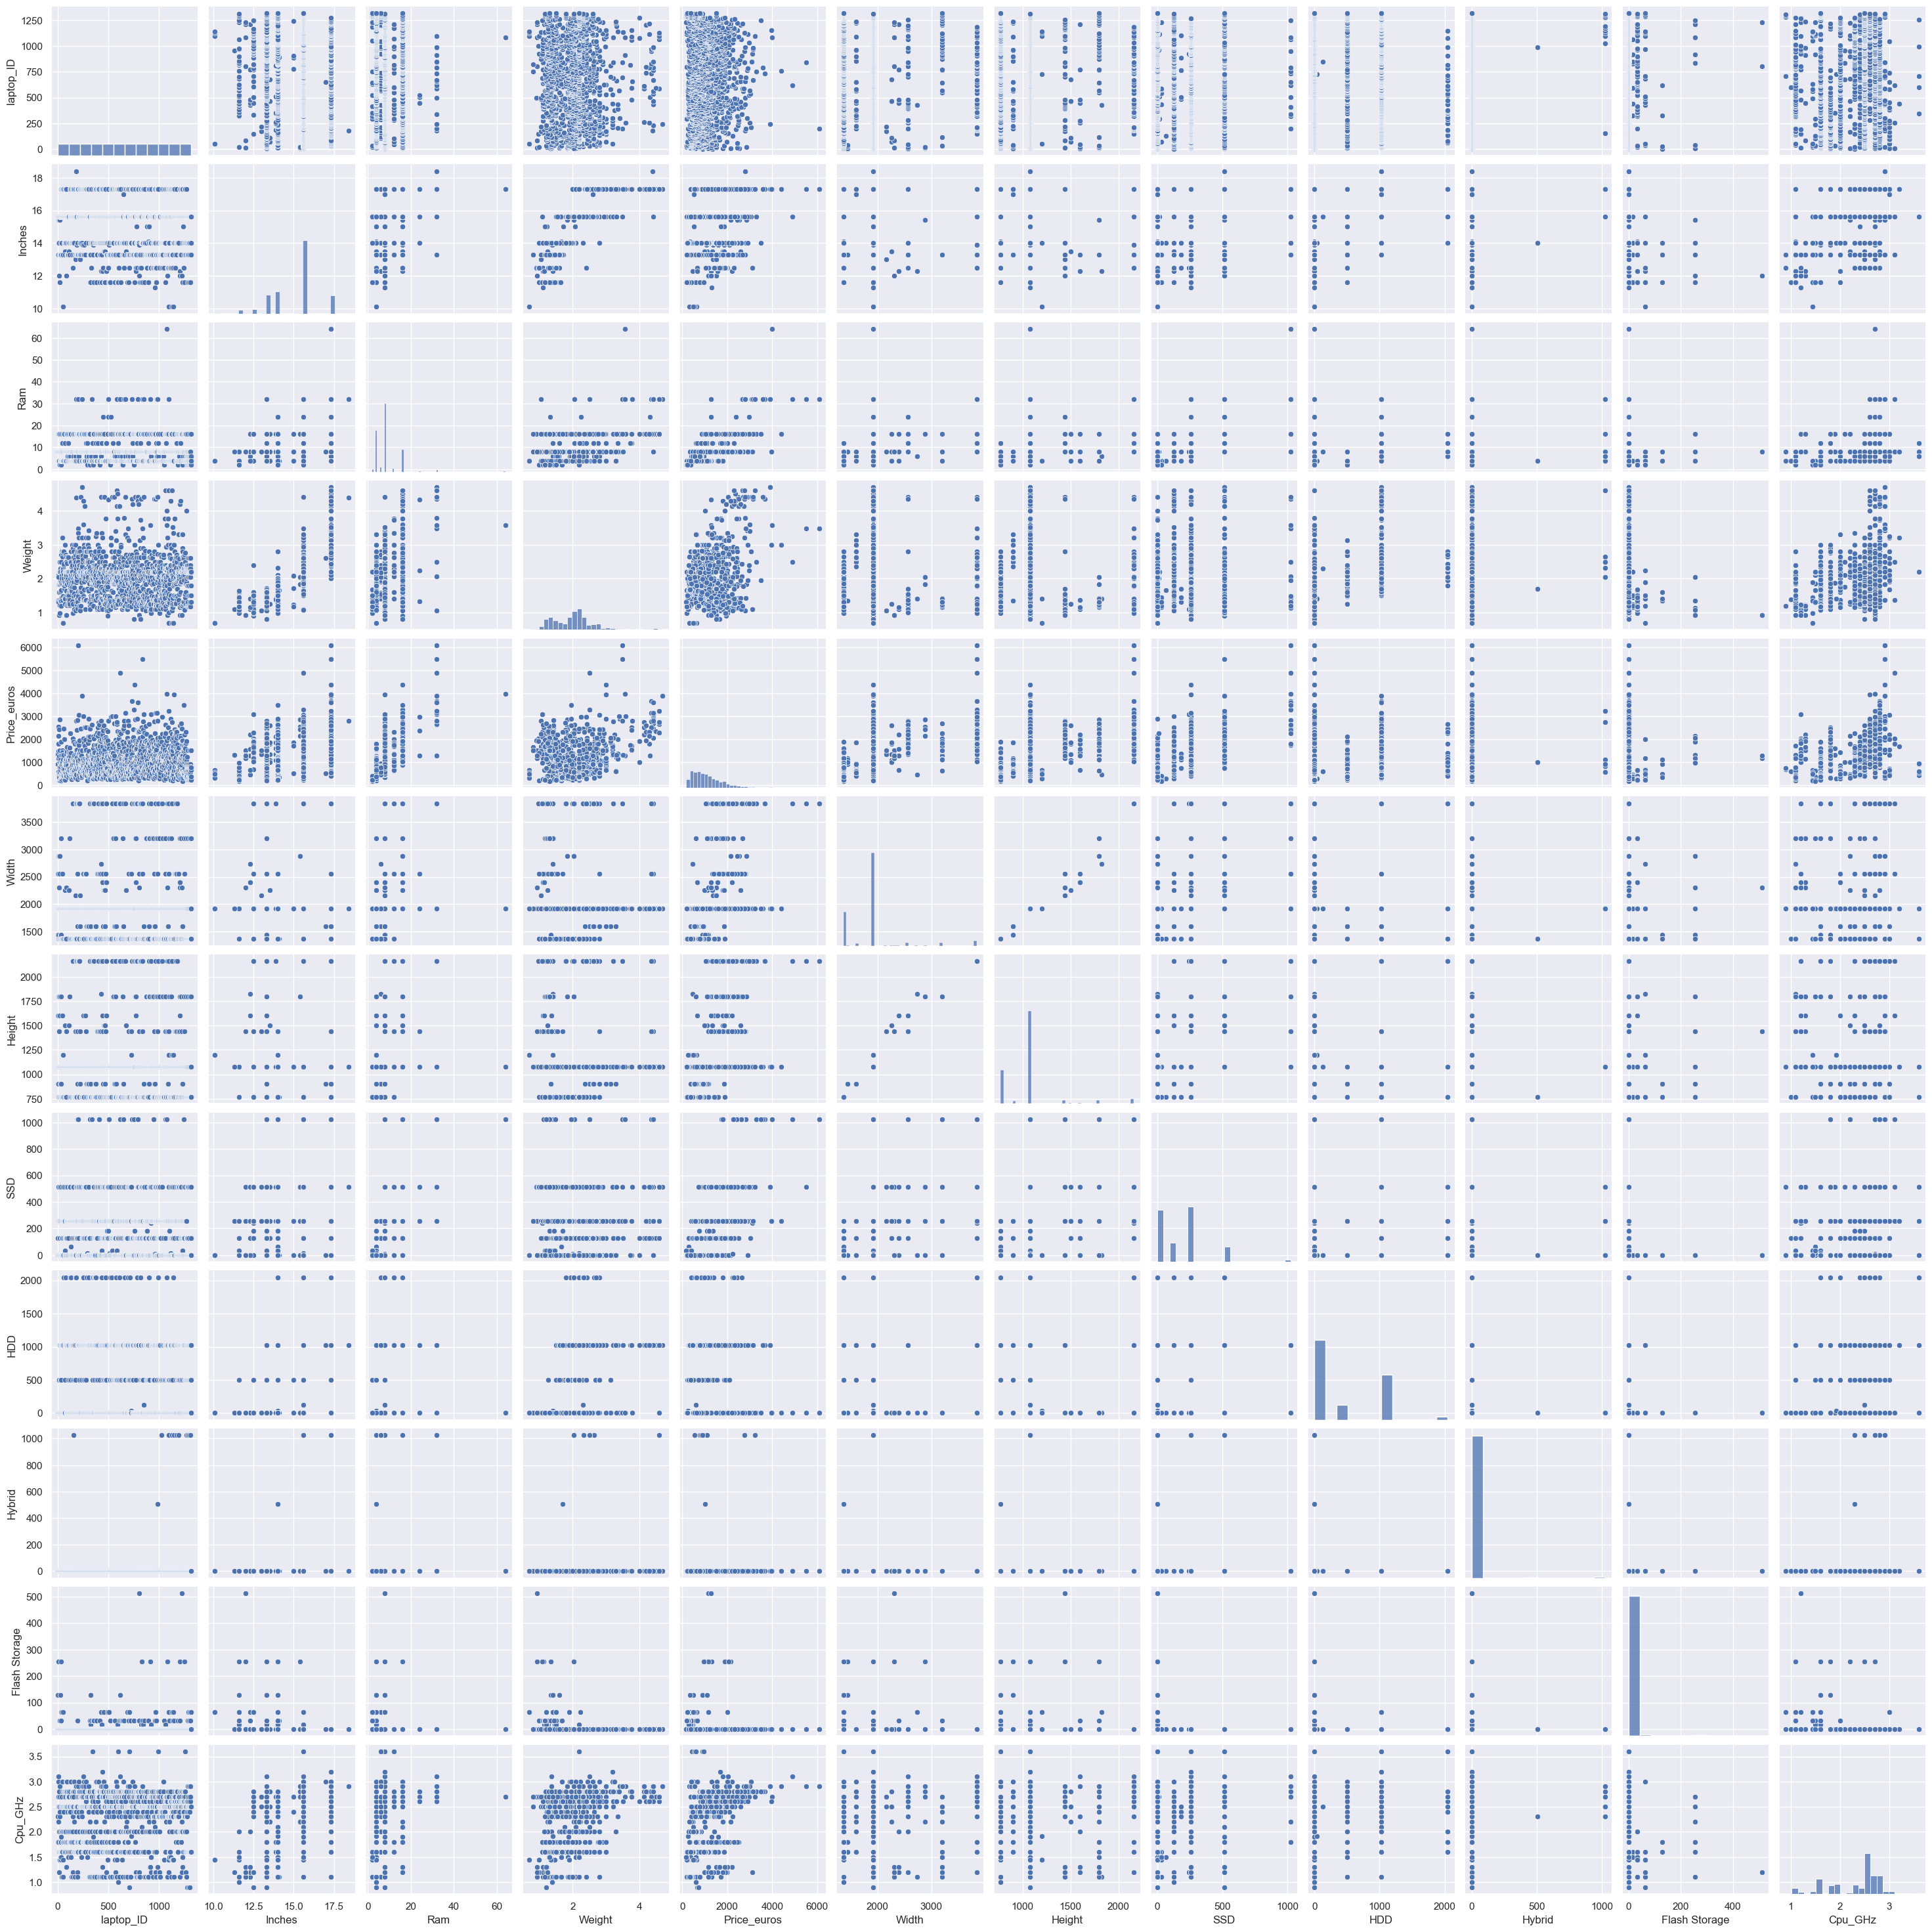

In [311]:
sns.pairplot(df)

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   laptop_ID      1303 non-null   int64  
 1   Company        1303 non-null   object 
 2   Product        1303 non-null   object 
 3   TypeName       1303 non-null   object 
 4   Inches         1303 non-null   float64
 5   Ram            1303 non-null   int32  
 6   Gpu            1303 non-null   object 
 7   OpSys          1303 non-null   object 
 8   Weight         1303 non-null   float64
 9   Price_euros    1303 non-null   float64
 10  Width          1303 non-null   int64  
 11  Height         1303 non-null   int64  
 12  SSD            1303 non-null   int64  
 13  HDD            1303 non-null   int64  
 14  Hybrid         1303 non-null   int64  
 15  Flash Storage  1303 non-null   int64  
 16  Cpu_GHz        1303 non-null   float64
 17  Cpu_model      1303 non-null   object 
dtypes: float

<Axes: xlabel='Flash Storage'>

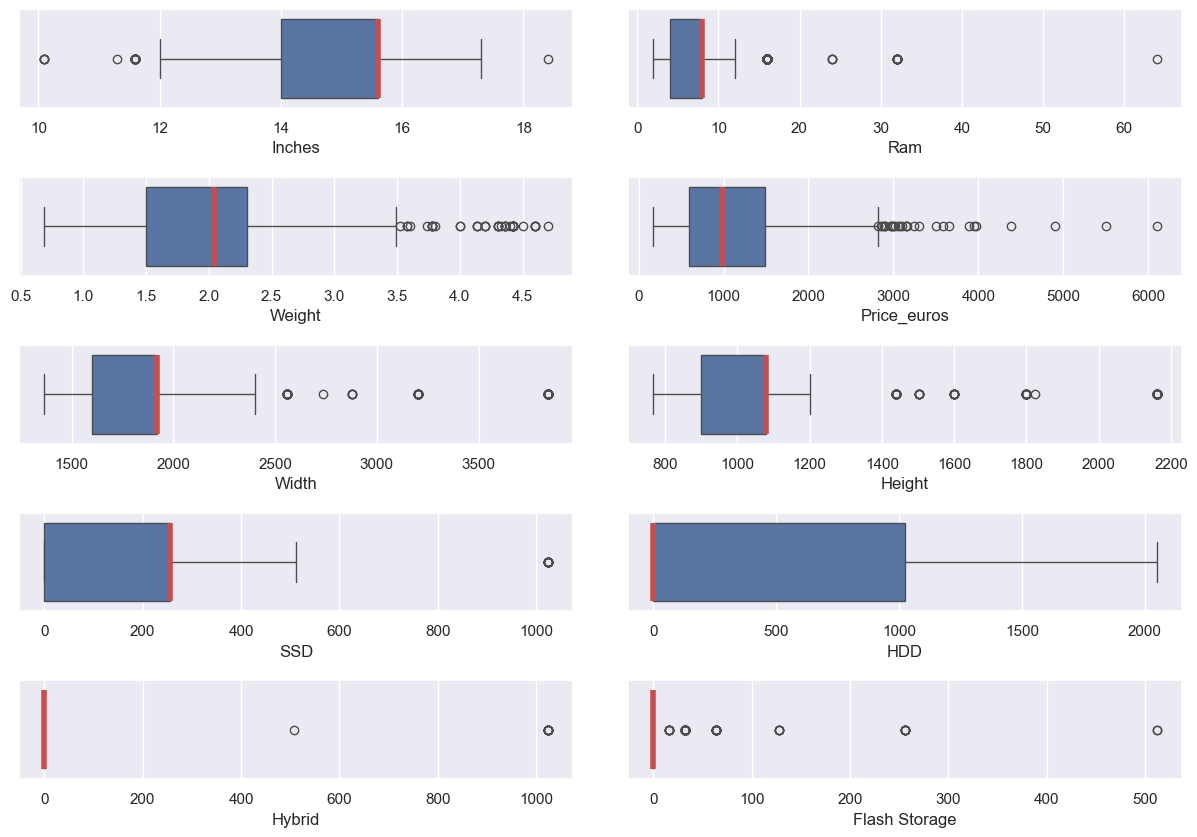

In [354]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(5, 2, figsize=(15,10))
plt.subplots_adjust(wspace=0.1, hspace=0.7)

sns.boxplot(df['Inches'], ax=axes[0,0], orient="h", medianprops={"color": "r", "linewidth": 4})
sns.boxplot(df['Ram'], ax=axes[0,1], orient="h", medianprops={"color": "r", "linewidth": 4})
sns.boxplot(df['Weight'], ax=axes[1,0], orient="h", medianprops={"color": "r", "linewidth": 4})
sns.boxplot(df['Price_euros'], ax=axes[1,1], orient="h", medianprops={"color": "r", "linewidth": 4})
sns.boxplot(df['Width'], ax=axes[2,0], orient="h", medianprops={"color": "r", "linewidth": 4})
sns.boxplot(df['Height'], ax=axes[2,1], orient="h", medianprops={"color": "r", "linewidth": 4})
sns.boxplot(df['SSD'], ax=axes[3,0], orient="h", medianprops={"color": "r", "linewidth": 4})
sns.boxplot(df['HDD'], ax=axes[3,1], orient="h", medianprops={"color": "r", "linewidth": 4})
sns.boxplot(df['Hybrid'], ax=axes[4,0], orient="h", medianprops={"color": "r", "linewidth": 4})
sns.boxplot(df['Flash Storage'], ax=axes[4,1], orient="h", medianprops={"color": "r", "linewidth": 4})

<Axes: xlabel='Cpu_GHz'>

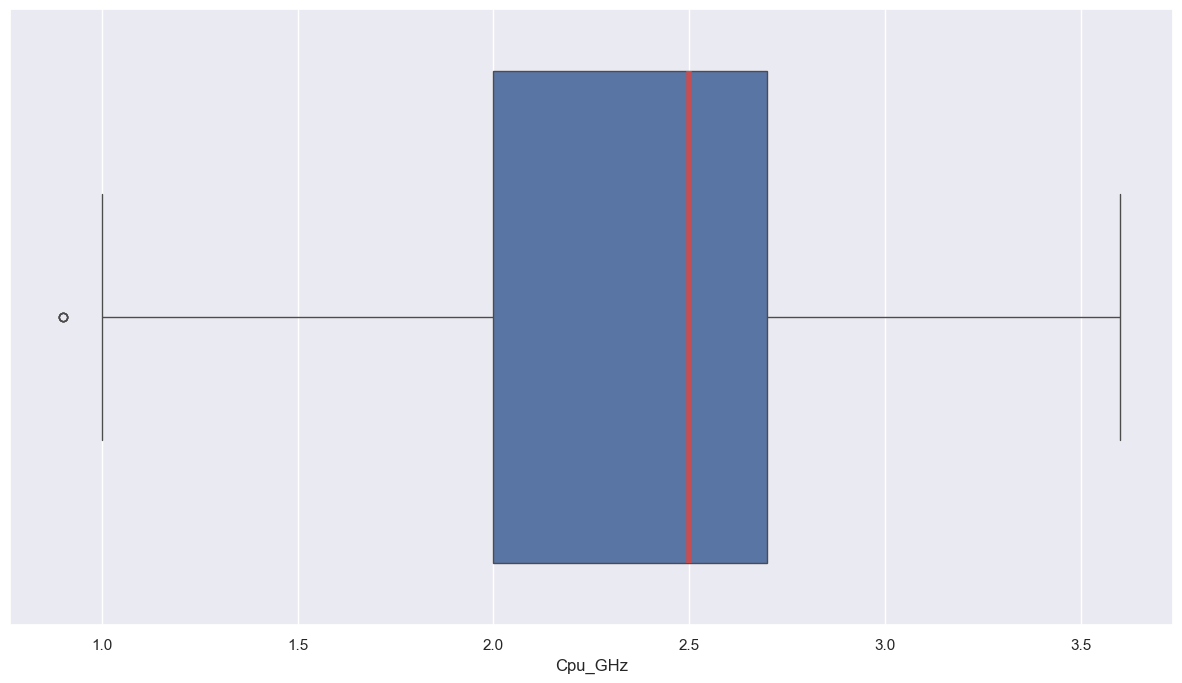

In [355]:
sns.boxplot(df['Cpu_GHz'], orient="h", medianprops={"color": "r", "linewidth": 4})

In [315]:
outliers = {}

for column in df.select_dtypes(exclude=['object']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_rows = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers[column] = outlier_rows

for column, rows in outliers.items():
    print(f'Выбросы для переменной {column}:')
    print(rows)

Выбросы для переменной laptop_ID:
Empty DataFrame
Columns: [laptop_ID, Company, Product, TypeName, Inches, Ram, Gpu, OpSys, Weight, Price_euros, Width, Height, SSD, HDD, Hybrid, Flash Storage, Cpu_GHz, Cpu_model]
Index: []
Выбросы для переменной Inches:
      laptop_ID   Company                               Product  \
20           21      Asus                       Vivobook E200HA   
50           51    Lenovo                             Yoga Book   
177         181       MSI                       GT80S 6QF-074US   
314         319      Asus                         VivoBook Flip   
319         324      Acer                          TravelMate B   
348         354      Asus                         VivoBook Flip   
376         382    Lenovo                              Yoga 11e   
409         416    Lenovo                        Lenovo IdeaPad   
429         436  Mediacom                         FlexBook Edge   
430         437   Samsung                          Chromebook 3   
455      

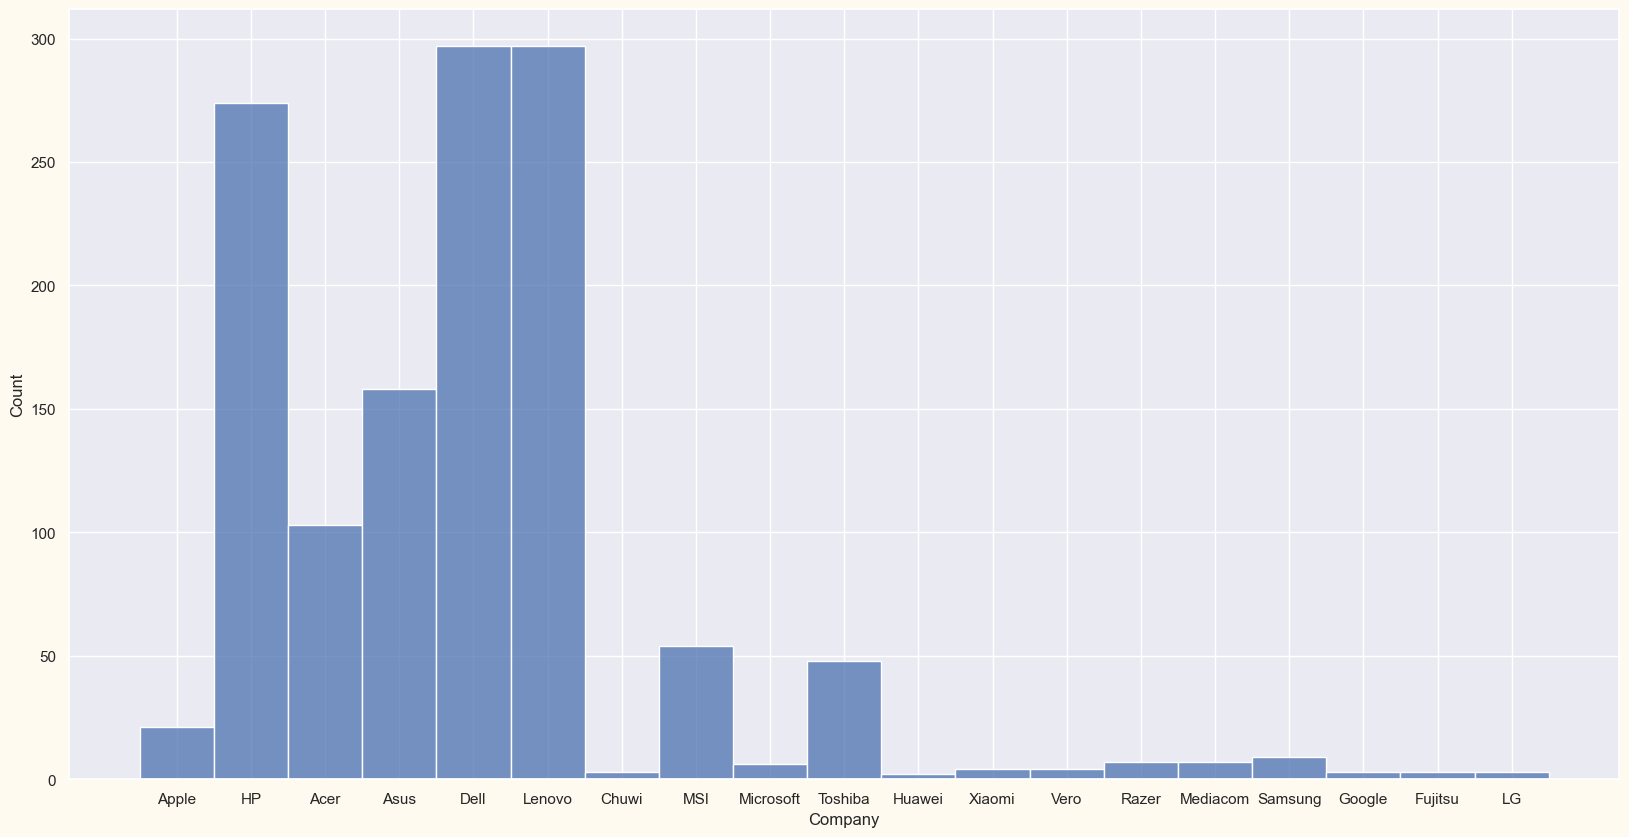

In [382]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(df['Company'], discrete=True)
fig.set_facecolor('floralwhite')

plt.show()